In [96]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [88]:
data = pd.read_csv("Boston.csv")
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [89]:
data = data.rename(columns={'medv': 'PRICE'})
data.corr()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,PRICE
Unnamed: 0,1.000000,0.407407,-0.103393,0.399439,-0.003759,0.398736,-0.079971,0.203784,-0.302211,0.686002,0.666626,0.291074,-0.295041,0.258465,-0.226604
crim,0.407407,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.103393,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.399439,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.003759,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.398736,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.079971,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.203784,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.302211,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.686002,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626


<Axes: >

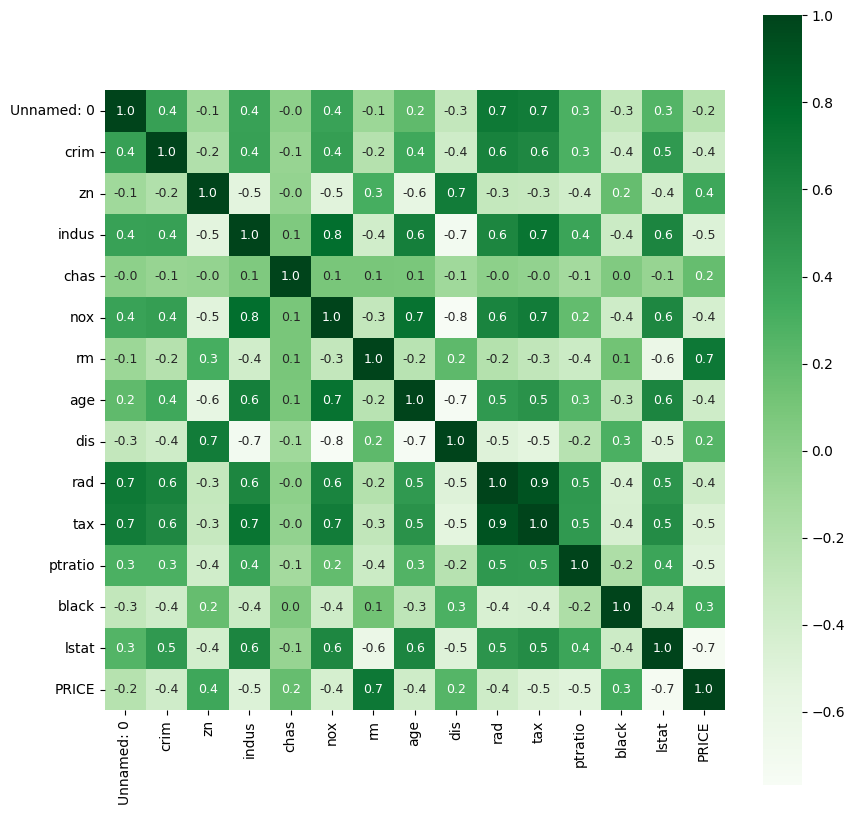

In [90]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':9}, cmap='Greens')

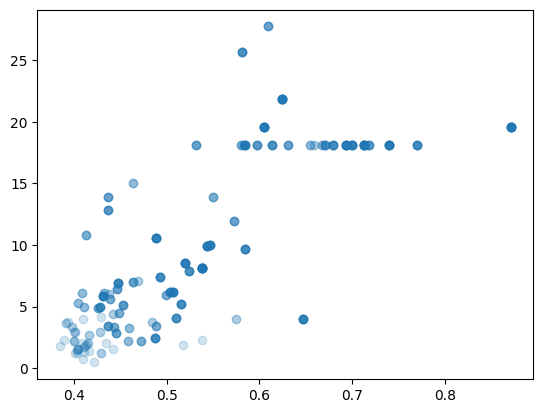

In [91]:
plt.scatter (data["nox"] , data["indus"], alpha=0.2)
plt.show()

In [92]:
x =np.array((data['tax'],data['nox'])).T
print(x)
y = np.array(data["indus"])
print(x.shape)
y.shape

[[296.      0.538]
 [242.      0.469]
 [242.      0.469]
 ...
 [273.      0.573]
 [273.      0.573]
 [273.      0.573]]
(506, 2)


(506,)

In [93]:
x_train , x_test , y_train , y_test = train_test_split(x , y ,test_size=0.2 , random_state=40)

In [97]:
class LLS :
    def __init__(self) :
        ...
        
    def fit(self , x_train , y_train):
        w = np.matmul(  np.matmul(np.linalg.inv( np.matmul(x_train.T  , x_train) ) , x_train.T ) , y_train )
        return w

    def predict(self , w , x_test): 
        y_pred = x_test * w
        return y_pred
    

lls = LLS()
w = lls.fit(x_train , y_train)
w

array([0.01946523, 6.47894852])

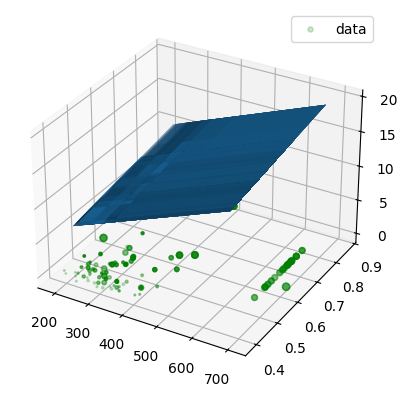

In [104]:
a, b = np.meshgrid(x_train[:,0], x_train[:,1])
plane = w[0] * a + w[1] * b 



fig = plt.figure( dpi=100, facecolor='w', edgecolor='k')
ax = plt.axes(projection='3d')
ax.plot_surface(a, b, plane , alpha= 0.2)
plt.scatter(x_train[:,0] , x_train[:,1] , y_train , label="data", color='green',alpha=0.2 )
plt.legend()
plt.show()